In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [8]:
d = pd.read_csv('wt_featurecounts.tsv', sep='\t', header=0, index_col=0)
d.drop(d.columns[[0, 1, 2, 3, 4, 5]], axis=1, inplace=True)
d.head()
d = np.log(d+1)

<Axes: >

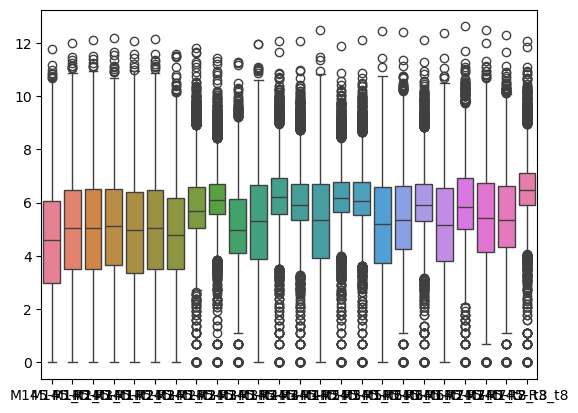

In [9]:
sns.boxplot(d)

In [10]:
rank_mean = d.stack().groupby(d.rank(method='first').stack().astype(int)).mean()
d_norm = d.rank(method='min').stack().astype(int).map(rank_mean).unstack()


<Axes: >

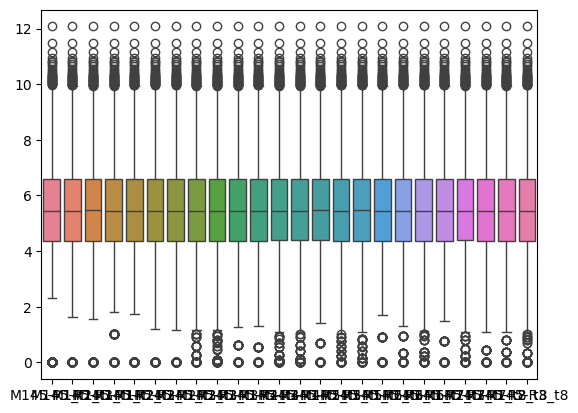

In [11]:
sns.boxplot(d_norm)

In [12]:
pd.DataFrame.to_csv(d_norm.T, 'wt_featurecounts_log_qnorm.txt', sep='\t')